# Graphiques du Tableau pour Cerlico : Entités nommées

### Importation des modules

- pickle pour la récupération des données de Conscila
- pandas pour la gestion des csv et les calculs type excel
- numpy pour les calculs en général
- matplotlib pour les graphiques

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy,datetime,pickle,re,codecs,unidecode
import io
from lxml import etree
from IPython.display import display

In [207]:
pd.__version__

u'0.24.2'

In [208]:
%matplotlib inline

In [209]:
import seaborn as sns
sns.set(style="ticks")
sns.set_style("whitegrid")
sns.set_palette("husl")
#sns.palplot(sns.color_palette("hls", 20))
sns.set_context("paper")
sns.set_context("notebook")

In [210]:
spkNoms={"spk1":"journaliste","spk2":"expert","spk3":"terrain"}
equipesDrapeau={"=Fr":u"🇫🇷","=Ar":u"🇦🇷"}

In [211]:
with open("partieGlobale.pkl","rb") as inFile:
    dfComplet=pickle.load(inFile)

In [212]:
dfComplet["excitation"]=pd.to_numeric(dfComplet["excitation"], errors='coerce')
dfComplet["début"]=pd.to_numeric(dfComplet["début"], errors='coerce')
dfComplet["fin"]=pd.to_numeric(dfComplet["fin"], errors='coerce')

In [213]:
dfTest=dfComplet["Spk noms joueurs texte-PxP texte-colour discours excitation".split(" ")]
dfTest[(dfTest["noms"].notnull())&(dfTest["texte-PxP"].notnull())&(dfTest["Spk"]=="spk1")].groupby(["joueurs","noms"]).count()

Spk  \
joueurs                                            noms                                  
Agustín Pichot=Ar                                  Pichot                           23   
Aurélien Rougerie=Fr                               Rougerie                          7   
Christophe Dominici=Fr                             Dominici                         12   
Christophe Dominici=Fr;Juan Martín Hernández=Ar    Hernandez,Dominici                1   
Cédric Heymans=Fr                                  Cédric Heymans                    5   
                                                   Heymans                          19   
Cédric Heymans=Fr;Christophe Dominici=Fr           Heymans,Dominici                  1   
Damien Traille=Fr                                  Damien Traille                    2   
                                                   Traille                           7   
Damien Traille=Fr;Pierre Mignoni=Fr                Mignoni,Damien Traille            1   
David Skrela=Fr                                    David Skrela                     14   
                                                   Skrela                           22   
David Skrela=Fr;Juan Martín Hernández=Ar           Hernandez,Skrela                  1   
David Skrela=Fr;Pierre Mignoni=Fr                  Mignoni,Skrela                    2   
Dimitri Szarzewski=Fr                              Dimitri Szarzewski                1   
                                                   Szarzewski                        1   
Fabien Pelous=Fr                                   Fabien Pelous                     1   
                                                   Pelous                            5   
Fabien Pelous=Fr;Pierre Mignoni=Fr                 Mignoni,Pelous                    1   
Felipe Contepomi=Ar                                Felipe Contepomi                  4   
Felipe Contepomi=Ar;Juan Martín Hernández=Ar;Ma... Hernandez,Contepomi               1   
Frédéric Michalak=Fr                               Michalak                          1   
Ignacio Corleto=Ar                                 Corleto                          11   
                                                   Ignacio Corleto                   1   
Ignacio Fernández Lobbe=Ar;Juan Martín Fernánde... Fernandez Lobbe                   3   
Imanol Harinordoquy=Fr                             Harinordoquy                      9   
                                                   Imanol Harinordoquy               1   
Imanol Harinordoquy=Fr;Pierre Mignoni=Fr           Mignoni,Harinordoquy              1   
Juan Manuel Leguizamón=Ar                          Leguizamon                        4   
Juan Martín Hernández=Ar                           Hernandez                        27   
...                                                                                ...   
Lucas Borges=Ar                                    Lucas Borges                      3   
Lucas Ostiglia=Ar;Juan Martín Fernández Lobbe=A... Ostiglia,Fernandez                1   
Manuel Contepomi=Ar;Felipe Contepomi=Ar            Contepomi                        14   
                                                   Felipe,Contepomi                  1   
Marcelo Loffreda=Ar                                Loffreda                          1   
Mario Ledesma=Ar                                   Ledesma                          10   
                                                   Mario Ledesma                     2   
                                                   Mario Ledesma,Mario               1   
Martín Durand=Ar;Martín Schusterman=Ar;Juan Mar... Pelous,Martin                     1   
Martín Scelzo=Ar;Agustín Pichot=Ar                 Scelzo,Pichot                     1   
Patricio Albacete=Ar                               Albacete                          1   
Pierre Mignoni=Fr                                  Mignoni                          26   
Pieter de Villiers=Fr            

## Interpolation des valeurs numériques

In [214]:
dfMatch=dfComplet.iloc[:15700].set_index("timeline")
for c in ["excitation","RJ5.00","D5.00","V5.00"]+"S1D5.00 S2D5.00 S3D5.00 V5.00 S1V5.00 S2V5.00 S3V5.00".split(" "):
    dfMatch[c]=dfMatch[c].interpolate(method="index")

## Remise à zéro des valeurs numériques pendant la mi-temps

In [215]:
for c in ["excitation","RJ5.00","D5.00","V5.00"]+"S1D5.00 S2D5.00 S3D5.00 V5.00 S1V5.00 S2V5.00 S3V5.00".split(" "): 
    dfMatch.loc[(dfMatch.index>271985)&(dfMatch.index<325843),c]=0

In [216]:
dfMatch[((dfMatch.index>271985)&(dfMatch.index<325843))][["excitation","RJ5.00"]]
#dfMatch.columns

excitation  RJ5.00
timeline                    
272000.0         0.0     0.0
272100.0         0.0     0.0
272200.0         0.0     0.0
272300.0         0.0     0.0
272400.0         0.0     0.0
272500.0         0.0     0.0
272600.0         0.0     0.0
272700.0         0.0     0.0
272800.0         0.0     0.0
272900.0         0.0     0.0
273000.0         0.0     0.0
273100.0         0.0     0.0
273200.0         0.0     0.0
273300.0         0.0     0.0
273400.0         0.0     0.0
273500.0         0.0     0.0
273600.0         0.0     0.0
273700.0         0.0     0.0
273800.0         0.0     0.0
273900.0         0.0     0.0
274000.0         0.0     0.0
274100.0         0.0     0.0
274200.0         0.0     0.0
274300.0         0.0     0.0
274400.0         0.0     0.0
274500.0         0.0     0.0
274600.0         0.0     0.0
274700.0         0.0     0.0
274800.0         0.0     0.0
274900.0         0.0     0.0
...              ...     ...
322900.0         0.0     0.0
323000.0         0.0     0.0
323100.0         0.0     0.0
323200.0         0.0     0.0
323300.0         0.0     0.0
323400.0         0.0     0.0
323500.0         0.0     0.0
323600.0         0.0     0.0
323700.0         0.0     0.0
323800.0         0.0     0.0
323900.0         0.0     0.0
324000.0         0.0     0.0
324100.0         0.0     0.0
324200.0         0.0     0.0
324300.0         0.0     0.0
324400.0         0.0     0.0
324500.0         0.0     0.0
324600.0         0.0     0.0
324700.0         0.0     0.0
324800.0         0.0     0.0
324900.0         0.0     0.0
325000.0         0.0     0.0
325100.0         0.0     0.0
325200.0         0.0     0.0
325300.0         0.0     0.0
325400.0         0.0     0.0
325500.0         0.0     0.0
325600.0         0.0     0.0
325700.0         0.0     0.0
325800.0         0.0     0.0

[539 rows x 2 columns]

# Traitement des corrections manuelles des Entités nommées

In [217]:
dfXLS=pd.read_excel("partieGlobale-Joueurs-CM.xlsx")

In [218]:
dfNomsXLS=dfXLS[dfXLS["joueurs"].notnull()].set_index("timeline")[["noms","joueurs"]]

In [219]:
dfMatch.update(dfNomsXLS)

In [220]:
selectColonnesNoms="Spk noms joueurs excitation émotion discours texte texte-PxP texte-colour début fin RJ5.00 D5.00 S1D5.00".split(" ")
dfNomsMatch=dfMatch[selectColonnesNoms]

In [221]:
dfNomsMatch[dfNomsMatch["joueurs"].notnull()][["Spk","joueurs","début","fin","discours"]]

Spk                                          joueurs    début  \
timeline                                                                   
3616.0    spk1                                  David Skrela=Fr    36.16   
4232.0    spk1                               Rodrigo Roncero=Ar    42.32   
4456.0    spk1                                Agustín Pichot=Ar    44.56   
4656.0    spk1                         Juan Martín Hernández=Ar    46.56   
7144.0    spk1                                Raphaël Ibañez=Fr    71.44   
8120.0    spk1                                Agustín Pichot=Ar    81.20   
8472.0    spk1                                Cédric Heymans=Fr    84.72   
8844.0    spk1                                Agustín Pichot=Ar    88.44   
9092.0    spk1                                Cédric Heymans=Fr    90.92   
9596.0    spk1                                  David Skrela=Fr    95.96   
9920.0    spk3                               Thierry Gilardi=Ot    99.20   
10000.0   spk2                                Agustín Pichot=Ar   100.00   
11104.0   spk2                                Cédric Heymans=Fr   111.04   
11740.0   spk2                                 Mario Ledesma=Ar   117.40   
11872.0   spk1                                 Mario Ledesma=Ar   118.72   
13568.0   spk1                                 Mario Ledesma=Ar   135.68   
14360.0   spk1                         Juan Martín Hernández=Ar   143.60   
14744.0   spk1                                Cédric Heymans=Fr   147.44   
16056.0   spk1                         Juan Martín Hernández=Ar   160.56   
16480.0   spk1                                Cédric Heymans=Fr   164.80   
18164.0   spk2                         Juan Martín Hernández=Ar   181.64   
19068.0   spk1                                 Mario Ledesma=Ar   190.68   
19872.0   spk1                                   Rémy Martin=Fr   198.72   
20468.0   spk1                             Patricio Albacete=Ar   204.68   
20716.0   spk1                   Juan Martín Fernández Lobbe=Ar   207.16   
21956.0   spk1                         Juan Martín Hernández=Ar   219.56   
22336.0   spk1  Christophe Dominici=Fr;Juan Martín Hernández=Ar   223.36   
23160.0   spk1                                Pierre Mignoni=Fr   231.60   
23464.0   spk1                            Pieter de Villiers=Fr   234.64   
23808.0   spk1                            Pieter de Villiers=Fr   238.08   
...        ...                                              ...      ...   
577614.0  spk1                            Dimitri Szarzewski=Fr  5776.14   
580710.0  spk1                                 Fabien Pelous=Fr  5807.10   
580858.0  spk1               Fabien Pelous=Fr;Raphaël Ibañez=Fr  5808.58   
582162.0  spk1                              Sébastien Chabal=Fr  5821.62   
583170.0  spk1                                Agustín Pichot=Ar  5831.70   
583262.0  spk1                         Juan Martín Hernández=Ar  5832.62   
583430.0  spk1                            Dimitri Szarzewski=Fr  5834.30   
583722.0  spk2                              Sébastien Chabal=Fr  5837.22   
583778.0  spk1                              Sébastien Chabal=Fr  5837.78   
584082.0  spk1                                  Serge Betsen=Fr  5840.82   
584586.0  spk1                                  Serge Betsen=Fr  5845.86   
584658.0  spk2                                  Serge Betsen=Fr  5846.58   
584849.0  spk2                              Sébastien Chabal=Fr  5848.49   
585766.0  spk2                                  Serge Betsen=Fr  5857.66   
586310.0  spk2                              Sébastien Chabal=Fr  5863.10   
586745.0  spk3                Raphaël Ibañez=Fr;Serge Betsen=Fr  5867.45   
587162.0  spk3                                  David Skrela=Fr  5871.62   
587478.0  spk1                              Fabrice Landreau=Ot  5874.78   
588014.0  spk1                                  David Skrela=Fr  5880.14   
588470.0  spk1               Fabien Pelous=Fr;Raphaël Ibañe

In [222]:
setJoueurs=set()
for j in list(dfMatch[dfMatch["joueurs"].notnull()]["joueurs"].unique()):
    if j=="":
        pass
    elif ";" in j:
        for lJ in j.split(";"):
            setJoueurs.add(lJ)
    else:
        setJoueurs.add(j)
setJoueurs

{u'Agust\xedn Pichot=Ar',
 u'Aur\xe9lien Rougerie=Fr',
 u'Bernard Laporte=Fr',
 u'Christophe Dominici=Fr',
 u'C\xe9dric Heymans=Fr',
 u'Damien Traille=Fr',
 u'David Ellis=En',
 u'David Skrela=Fr',
 u'Dimitri Szarzewski=Fr',
 u'Fabien Pelous=Fr',
 u'Fabrice Landreau=Ot',
 u'Felipe Contepomi=Ar',
 u'Fr\xe9d\xe9ric Michalak=Fr',
 u'Hern\xe1n Senillosa=Ar',
 u'Ignacio Corleto=Ar',
 u'Ignacio Fern\xe1ndez Lobbe=Ar',
 u'Imanol Harinordoquy=Fr',
 u'Jean-Baptiste Poux=Fr',
 u'Jean-Baptiste \xc9lissalde=Fr',
 u'Jo Maso=Fr',
 u'Juan Manuel Leguizam\xf3n=Ar',
 u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar',
 u'Juan Mart\xedn Hern\xe1ndez=Ar',
 u'Julien Bonnaire=Fr',
 u'J\xe9r\xf4me Thion=Fr',
 u'Lucas Borges=Ar',
 u'Lucas Ostiglia=Ar',
 u'Manuel Contepomi=Ar',
 u'Marcelo Loffreda=Ar',
 u'Mario Ledesma=Ar',
 u'Mart\xedn Scelzo=Ar',
 u'Olivier Milloud=Fr',
 u'Patricio Albacete=Ar',
 u'Pierre Mignoni=Fr',
 u'Pieter de Villiers=Fr',
 u'Rapha\xebl Iba\xf1ez=Fr',
 u'Rimas \xc1lvarez Kairelis=Ar',
 u'Rodrigo R

In [223]:
joueurDenominations={}
for jp in setJoueurs:
    j=jp.split("=")[0]
    joueurDenominations[jp]=[j.split(" ")[0],j.split(" ")[1],j," ".join(j.split(" ")[1:])]
joueurDenominations

{u'Agust\xedn Pichot=Ar': [u'Agust\xedn',
  u'Pichot',
  u'Agust\xedn Pichot',
  u'Pichot'],
 u'Aur\xe9lien Rougerie=Fr': [u'Aur\xe9lien',
  u'Rougerie',
  u'Aur\xe9lien Rougerie',
  u'Rougerie'],
 u'Bernard Laporte=Fr': [u'Bernard',
  u'Laporte',
  u'Bernard Laporte',
  u'Laporte'],
 u'Christophe Dominici=Fr': [u'Christophe',
  u'Dominici',
  u'Christophe Dominici',
  u'Dominici'],
 u'C\xe9dric Heymans=Fr': [u'C\xe9dric',
  u'Heymans',
  u'C\xe9dric Heymans',
  u'Heymans'],
 u'Damien Traille=Fr': [u'Damien', u'Traille', u'Damien Traille', u'Traille'],
 u'David Ellis=En': [u'David', u'Ellis', u'David Ellis', u'Ellis'],
 u'David Skrela=Fr': [u'David', u'Skrela', u'David Skrela', u'Skrela'],
 u'Dimitri Szarzewski=Fr': [u'Dimitri',
  u'Szarzewski',
  u'Dimitri Szarzewski',
  u'Szarzewski'],
 u'Fabien Pelous=Fr': [u'Fabien', u'Pelous', u'Fabien Pelous', u'Pelous'],
 u'Fabrice Landreau=Ot': [u'Fabrice',
  u'Landreau',
  u'Fabrice Landreau',
  u'Landreau'],
 u'Felipe Contepomi=Ar': [u'Felipe

In [224]:
for jp in joueurDenominations:
    joueurDenominations[jp]=[unidecode.unidecode(k) for k in joueurDenominations[jp]]
    if joueurDenominations[jp][1]==joueurDenominations[jp][3]:
        joueurDenominations[jp][3]=None
joueurDenominations[u'Juan Mart\xedn Hern\xe1ndez=Ar'][0]="Juan Martin"
joueurDenominations[u'Juan Mart\xedn Hern\xe1ndez=Ar'][1]="Hernandez"
joueurDenominations[u'Juan Mart\xedn Hern\xe1ndez=Ar'][3]=None
joueurDenominations[u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar'][0]="Juan Martin"
joueurDenominations[u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar'][1]="Fernandez"
joueurDenominations[u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar'][3]="Fernandez Lobbe"
joueurDenominations[u'Juan Manuel Leguizam\xf3n=Ar'][0]="Juan Manuel"
joueurDenominations[u'Juan Manuel Leguizam\xf3n=Ar'][1]="Leguizamon"
joueurDenominations[u'Juan Manuel Leguizam\xf3n=Ar'][3]=None
joueurDenominations[u'Pieter de Villiers=Fr'][1]="de Villiers"
joueurDenominations[u'Pieter de Villiers=Fr'][3]=None
joueurDenominations


{u'Agust\xedn Pichot=Ar': ['Agustin', 'Pichot', 'Agustin Pichot', None],
 u'Aur\xe9lien Rougerie=Fr': ['Aurelien',
  'Rougerie',
  'Aurelien Rougerie',
  None],
 u'Bernard Laporte=Fr': ['Bernard', 'Laporte', 'Bernard Laporte', None],
 u'Christophe Dominici=Fr': ['Christophe',
  'Dominici',
  'Christophe Dominici',
  None],
 u'C\xe9dric Heymans=Fr': ['Cedric', 'Heymans', 'Cedric Heymans', None],
 u'Damien Traille=Fr': ['Damien', 'Traille', 'Damien Traille', None],
 u'David Ellis=En': ['David', 'Ellis', 'David Ellis', None],
 u'David Skrela=Fr': ['David', 'Skrela', 'David Skrela', None],
 u'Dimitri Szarzewski=Fr': ['Dimitri',
  'Szarzewski',
  'Dimitri Szarzewski',
  None],
 u'Fabien Pelous=Fr': ['Fabien', 'Pelous', 'Fabien Pelous', None],
 u'Fabrice Landreau=Ot': ['Fabrice', 'Landreau', 'Fabrice Landreau', None],
 u'Felipe Contepomi=Ar': ['Felipe', 'Contepomi', 'Felipe Contepomi', None],
 u'Fr\xe9d\xe9ric Michalak=Fr': ['Frederic',
  'Michalak',
  'Frederic Michalak',
  None],
 u'Hern\x

In [225]:
for j in setJoueurs:
        dfNomsMatch[j]=dfNomsMatch["joueurs"].apply(lambda x: np.array([0,0,0,0]))
dfNomsMatch[u"dénominations"]=dfNomsMatch["joueurs"].apply(lambda x: np.array([0,0,0,0]))

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [226]:
dfNomsMatch

Spk          noms          joueurs  excitation émotion   discours  \
timeline                                                                       
3000.0     NaN           NaN              NaN         NaN     NaN        NaN   
3100.0     NaN           NaN              NaN         NaN     NaN        NaN   
3200.0     NaN           NaN              NaN         NaN     NaN        NaN   
3220.0    spk1           NaN              NaN         2.0          narration   
3254.0    spk1           NaN              NaN         2.0     NaN        NaN   
3300.0     NaN           NaN              NaN         2.0     NaN        NaN   
3349.0     NaN           NaN              NaN         2.0     NaN        NaN   
3400.0     NaN           NaN              NaN         2.0     NaN        NaN   
3479.0     NaN           NaN              NaN         2.0     NaN        NaN   
3500.0     NaN           NaN              NaN         2.0     NaN        NaN   
3513.0     NaN           NaN              NaN         2.0     NaN        NaN   
3569.0     NaN           NaN              NaN         2.0     NaN        NaN   
3588.0     NaN           NaN              NaN         2.0     NaN        NaN   
3600.0     NaN           NaN              NaN         2.0     NaN        NaN   
3616.0    spk1  David Skrela  David Skrela=Fr         2.0          narration   
3639.0     NaN           NaN              NaN         2.0     NaN        NaN   
3668.0     NaN           NaN              NaN         2.0     NaN        NaN   
3694.0    spk1           NaN              NaN         2.0     NaN        NaN   
3700.0     NaN           NaN              NaN         2.0     NaN        NaN   
3793.0     NaN           NaN              NaN         2.0     NaN        NaN   
3800.0     NaN           NaN              NaN         2.0     NaN        NaN   
3806.0    spk1           NaN              NaN         2.0     NaN        NaN   
3850.0     NaN           NaN              NaN         2.0     NaN        NaN   
3900.0     NaN           NaN              NaN         2.0     NaN        NaN   
3934.0     NaN           NaN              NaN         2.0     NaN        NaN   
3960.0    spk2           NaN              NaN         2.0          narration   
4000.0     NaN           NaN              NaN         2.0     NaN        NaN   
4042.0    spk2           NaN              NaN         2.0     NaN        NaN   
4070.0    spk2           NaN              NaN         2.0     NaN        NaN   
4100.0     NaN           NaN              NaN         2.0     NaN        NaN   
...        ...           ...              ...         ...     ...        ...   
637350.0   NaN           NaN              NaN         0.0     NaN        NaN   
637370.0  spk2           NaN              NaN         0.0     NaN        NaN   
637400.0   NaN           NaN              NaN         0.0     NaN        NaN   
637500.0   NaN           NaN              NaN         0.0     NaN        NaN   
637600.0   NaN           NaN              NaN         0.0     NaN        NaN   
637695.0   NaN           NaN              NaN         0.0     NaN        NaN   
637700.0   NaN           NaN              NaN         0.0     NaN        NaN   
637734.0  spk1           NaN              NaN         0.0     NaN        NaN   
637785.0   NaN           NaN              NaN         0.0     NaN        NaN   
637800.0   NaN           NaN              NaN         0.0     NaN        NaN   
637813.0   NaN           NaN              NaN         0.0     NaN        NaN   
637879.0   NaN           NaN              NaN         0.0     NaN        NaN   
637900.0   NaN           NaN              NaN         0.0     NaN        NaN   
637906.0   NaN           NaN              NaN         0.0     NaN        NaN   
638000.0   NaN           NaN              NaN         0.0     NaN        NaN   
638100.0   NaN           NaN              NaN         0.0     NaN        NaN   
638149.0   NaN           NaN              NaN         0.0     NaN        NaN   
638158.0  s

In [227]:
def compterJoueur(row,joueur):
    denominations=joueurDenominations[joueur]
    comptes=[0,0,0,0]
    elements=row["noms"].split(",")
    for element in elements:
        elementDecode=unidecode.unidecode(element)
        if elementDecode in denominations:
            comptes[denominations.index(elementDecode)]+=1
    print ",".join([u"%d"%c for c in comptes])
    return np.array(comptes)
#    return ",".join([u"%d"%c for c in comptes])

def compterNoms(col):
    print col
    return
    tPrenom,tNom,tPN,tNN=0,0,0,0
    [nPrenom,nNom,nPN,nNN]=[int(i) for i in r.split(u",")]
    tPrenom+=nPrenom
    tNom+=nNom
    tPN+=nPN
    tNN+=nNN
    result=[tPrenom,tNom,tPN,tNN]
    return ",".join(["%d"%i for i in result])

In [228]:
r="1,0,1,1"
[nPrenom,nNom,nPN,nNN]=[int(i) for i in r.split(",")]
nPrenom,nNom,nPN,nNN

(1, 0, 1, 1)

In [229]:
for j in setJoueurs:
    print j
    dfNomsMatch.loc[(dfNomsMatch["joueurs"].notnull()) & (dfNomsMatch["joueurs"].str.contains(j)),j]=dfNomsMatch[(dfNomsMatch["joueurs"].notnull()) & (dfNomsMatch["joueurs"].str.contains(j))].apply(compterJoueur,args=[j],axis=1)

Ignacio Corleto=Ar
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,0,1,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
Pieter de Villiers=Fr
0,1,0,0
0,1,0,0
0,0,1,0
0,0,1,0
0,1,0,0
0,0,1,0
0,1,0,0
0,0,1,0
0,1,0,0
0,0,1,0
0,1,1,0
0,0,1,0
Rémy Martin=Fr
0,0,1,0
0,0,1,0
0,1,0,0
0,1,0,0
0,0,1,0
0,0,1,0
0,0,1,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,0,1,0
0,0,1,0
0,0,1,0
0,0,1,0
0,1,0,0
1,0,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,0,1,0
0,0,2,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,0,1,0
0,0,1,0
Yannick Jauzion=Fr
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,0,1,0
0,1,0,0
Julien Bonnaire=Fr
0,0,1,0
0,0,1,0
Manuel Contepomi=Ar
0,1,0,0
0,1,0,0
0,1,0,0
Juan Manuel Leguizamón=Ar
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
Jérôme Thion=Fr
0,0,1,0
0,0,1,0
0,0,1,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
David Ellis=En
1,0,0,0
1,0,0,0
Fabrice Landr

In [230]:
dfNomsMatch.loc[dfNomsMatch["joueurs"].notnull(),u"dénomination"]=dfNomsMatch.loc[dfNomsMatch["joueurs"].notnull(),setJoueurs].apply(np.sum,axis=1)




In [274]:
for numColonne,colonne in enumerate(u"prénom nom PN NN".split(" ")):
    dfNomsMatch.loc[dfNomsMatch["joueurs"].notnull(),colonne]=dfNomsMatch[dfNomsMatch["joueurs"].notnull()][u"dénomination"].str[numColonne]

In [275]:
dfNomsMatch[dfNomsMatch["joueurs"].notnull()][u"prénom nom PN NN".split(" ")]

prénom  nom   PN   NN
timeline                       
3616.0       0.0  0.0  1.0  0.0
4232.0       0.0  1.0  0.0  0.0
4456.0       0.0  1.0  0.0  0.0
4656.0       0.0  1.0  0.0  0.0
7144.0       0.0  0.0  1.0  0.0
8120.0       0.0  1.0  0.0  0.0
8472.0       0.0  0.0  1.0  0.0
8844.0       0.0  1.0  0.0  0.0
9092.0       0.0  1.0  0.0  0.0
9596.0       0.0  0.0  1.0  0.0
9920.0       1.0  0.0  0.0  0.0
10000.0      0.0  0.0  1.0  0.0
11104.0      0.0  1.0  0.0  0.0
11740.0      0.0  1.0  0.0  0.0
11872.0      1.0  0.0  1.0  0.0
13568.0      0.0  1.0  0.0  0.0
14360.0      0.0  1.0  0.0  0.0
14744.0      0.0  0.0  1.0  0.0
16056.0      0.0  0.0  1.0  0.0
16480.0      0.0  0.0  1.0  0.0
18164.0      0.0  1.0  0.0  0.0
19068.0      0.0  0.0  1.0  0.0
19872.0      0.0  0.0  1.0  0.0
20468.0      0.0  1.0  0.0  0.0
20716.0      0.0  0.0  0.0  1.0
21956.0      0.0  1.0  0.0  0.0
22336.0      0.0  2.0  0.0  0.0
23160.0      0.0  1.0  0.0  0.0
23464.0      0.0  1.0  0.0  0.0
23808.0      0.0  0.0  1.0  0.0
...          ...  ...  ...  ...
577614.0     0.0  0.0  1.0  0.0
580710.0     0.0  1.0  0.0  0.0
580858.0     0.0  2.0  0.0  0.0
582162.0     0.0  1.0  0.0  0.0
583170.0     0.0  1.0  0.0  0.0
583262.0     0.0  1.0  0.0  0.0
583430.0     0.0  1.0  0.0  0.0
583722.0     0.0  1.0  0.0  0.0
583778.0     0.0  1.0  0.0  0.0
584082.0     0.0  1.0  0.0  0.0
584586.0     1.0  0.0  0.0  0.0
584658.0     0.0  1.0  0.0  0.0
584849.0     0.0  1.0  0.0  0.0
585766.0     0.0  1.0  1.0  0.0
586310.0     0.0  1.0  0.0  0.0
586745.0     0.0  1.0  1.0  0.0
587162.0     0.0  0.0  1.0  0.0
587478.0     1.0  0.0  0.0  0.0
588014.0     0.0  0.0  1.0  0.0
588470.0     0.0  2.0  0.0  0.0
588658.0     0.0  1.0  0.0  0.0
590018.0     0.0  2.0  0.0  0.0
590926.0     0.0  1.0  0.0  0.0
591322.0     0.0  1.0  0.0  0.0
591686.0     0.0  1.0  0.0  0.0
593066.0     0.0  0.0  0.0  0.0
593562.0     1.0  0.0  0.0  0.0
593658.0     0.0  1.0  0.0  0.0
593710.0     0.0  0.0  1.0  0.0
594530.0     0.0  0.0  1.0  0.0

[546 rows x 4 columns]

In [232]:
#dfJoueurs=pd.DataFrame(columns="prénom nom PN NN".split(" "))
dfJoueurs=pd.DataFrame(columns=range(4))

# Distribution générale des dénominations

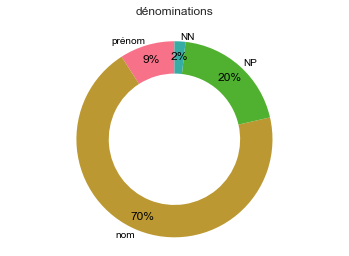

In [233]:
dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][[u"dénomination"]].apply(np.sum)
dfJoueurs=dfJoueurs.append(dfAX.T)
ax=dfAX.plot(kind="pie",y=u"dénomination",
             labels=u"prénom nom NP NN".split(" "),
             labeldistance=1.05,
             startangle=90,
             wedgeprops=dict(width=0.33),
             radius=1,
             autopct=lambda p: '%1d%%'%round(p) if round(p) > 0 else '',
             pctdistance = 0.85,
             textprops=dict(color="black",
                            ),
            )
ax.axis('equal')                
ax.set(ylabel="")
ax.get_legend().remove()
plt.title(u"dénominations",y=1.05)
plt.show()

# Dénominations par type de tour (PxP vs colour)
- à séparer par speaker dans un donut intérieur

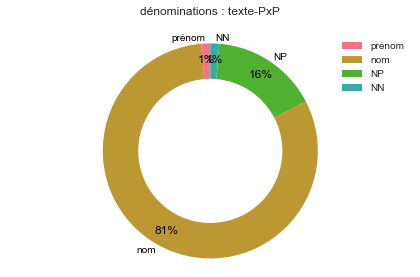

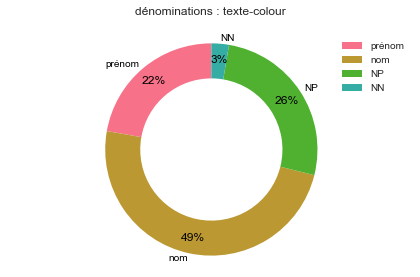

In [242]:
for tour in ["texte-PxP","texte-colour"]:
    dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())&(dfNomsMatch[tour].notnull())][[u"dénomination"]].apply(np.sum)
    ax=dfAX.plot(kind="pie",y=u"dénomination",
                 labels=u"prénom nom NP NN".split(" "),
                 labeldistance=1.05,
                 startangle=90,
                 wedgeprops=dict(width=0.33),
                 radius=1,
                 autopct=lambda p: '%1d%%'%round(p) if round(p) > 0 else '',
                 pctdistance = 0.85,
                 textprops=dict(color="black",
                                ),
                )
    ax.axis('equal')                
    ax.set(ylabel="")
    plt.title(u"dénominations : %s"%tour,y=1.05)
    plt.tight_layout()
    plt.show()

# Donut des dénominations par joueur
En même temps qu'on dessine les donuts, on alimente un tableau général pour les dénominations des joueurs *dfJoueurs*

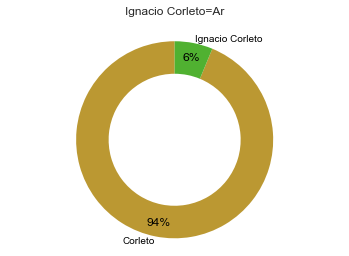

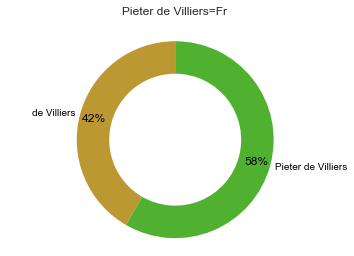

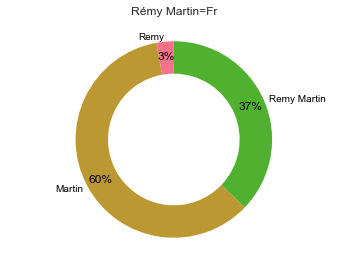

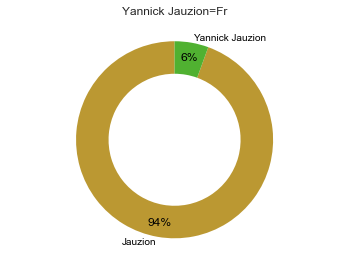

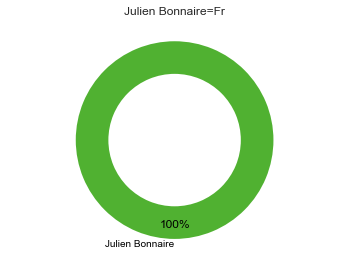

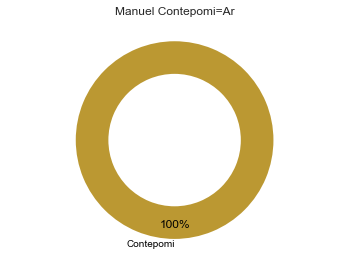

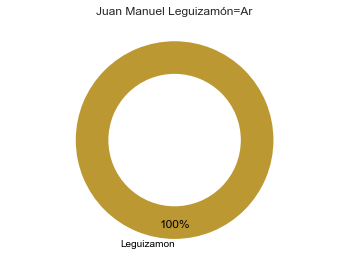

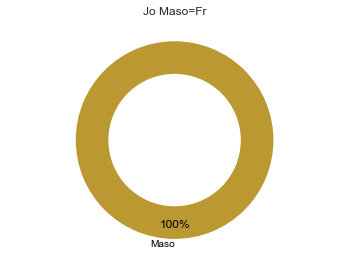

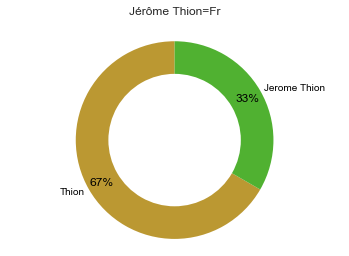

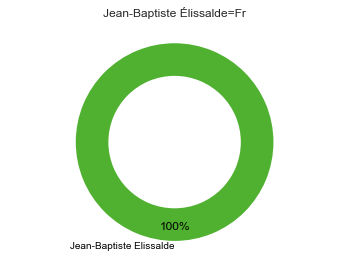

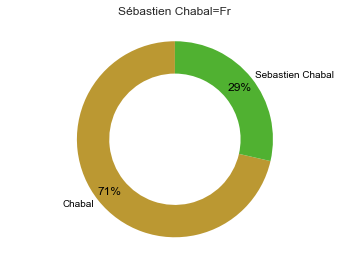

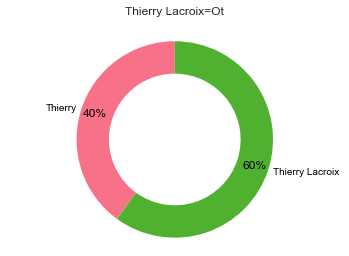

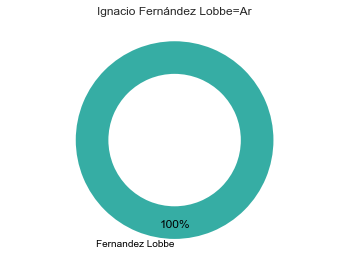

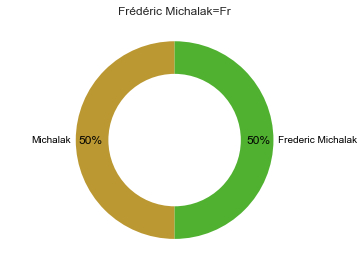

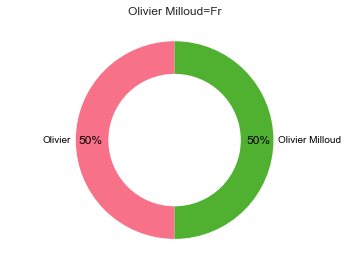

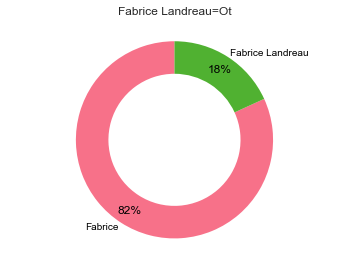

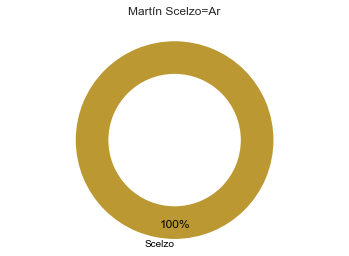

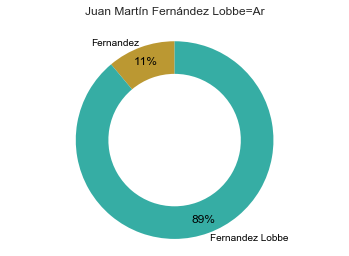

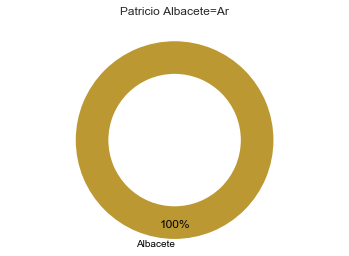

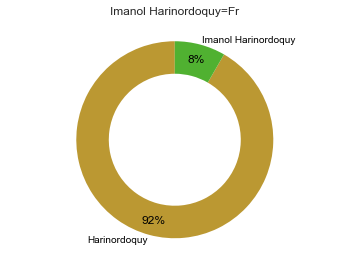

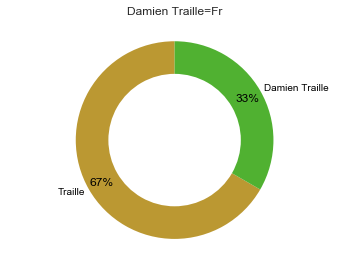

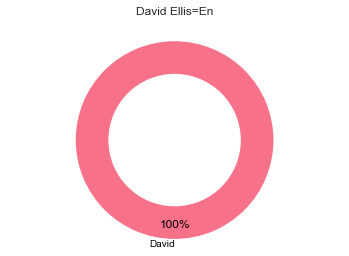

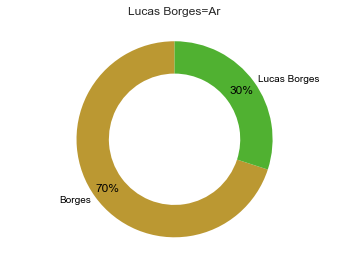

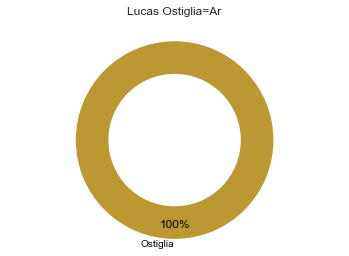

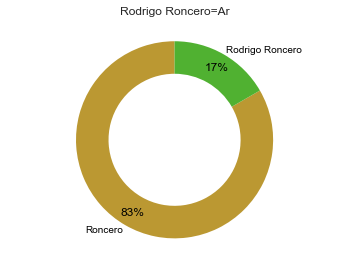

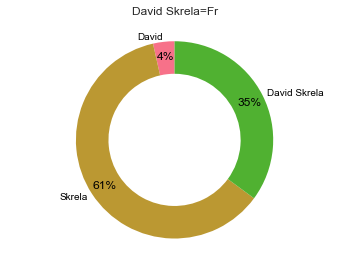

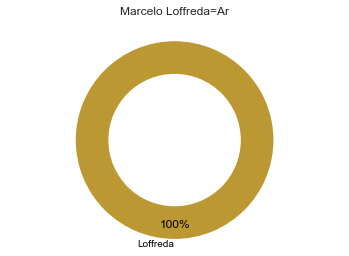

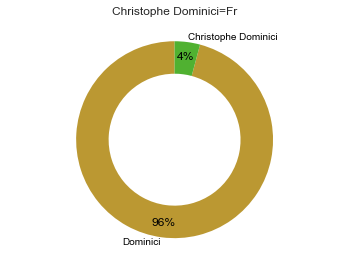

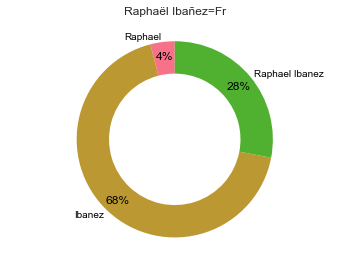

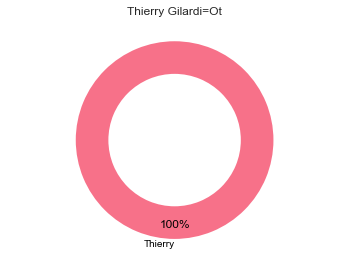

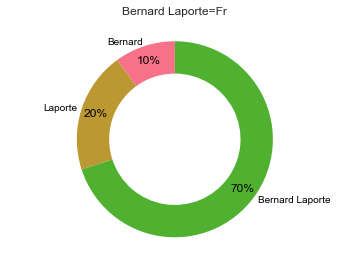

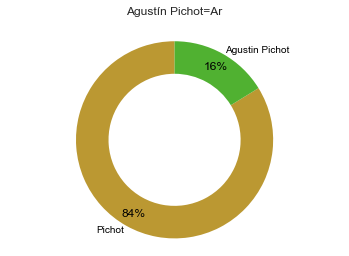

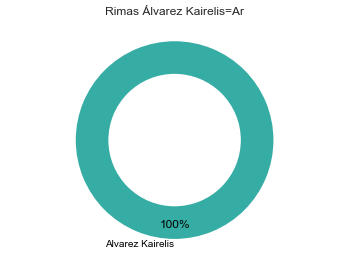

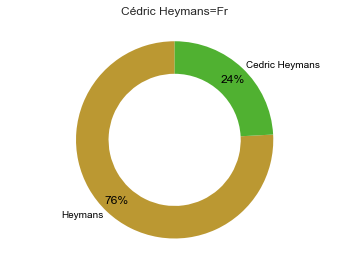

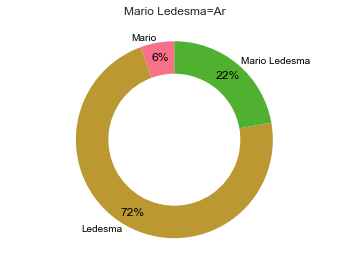

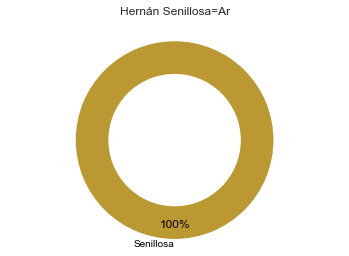

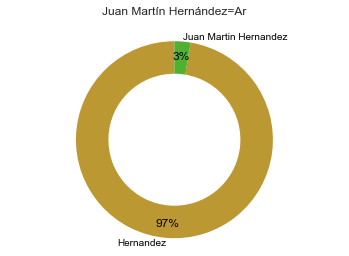

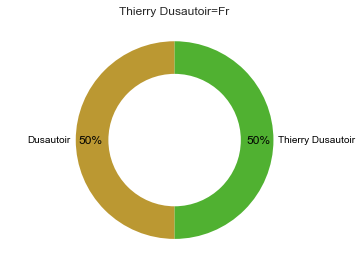

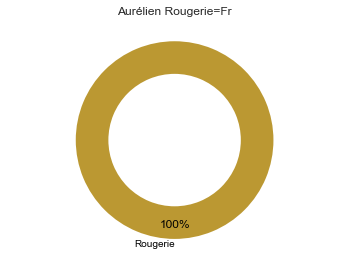

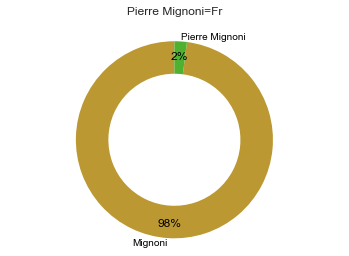

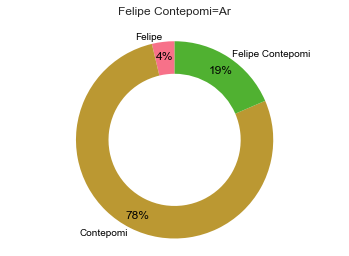

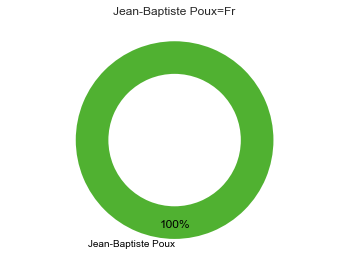

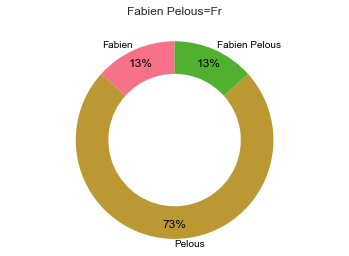

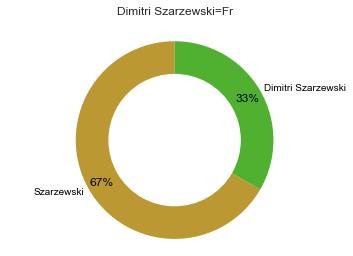

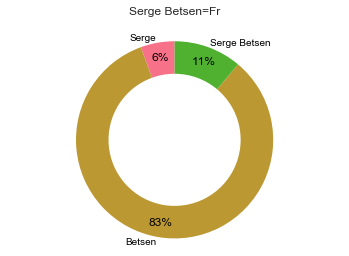

In [243]:
for joueur in joueurDenominations:
    dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][[joueur]].apply(np.sum)
    dfJoueurs=dfJoueurs.append(dfAX.T)
    ax=dfAX.plot(kind="pie",y=joueur,
                 labels=joueurDenominations[joueur],
                 labeldistance=1.05,
                 startangle=90,
                 wedgeprops=dict(width=0.33),
                 radius=1,
                 autopct=lambda p: '%1d%%'%round(p) if round(p) > 0 else '',
                 pctdistance = 0.85,
                 textprops=dict(color="black",
                                ),
                )
    ax.axis('equal')                
    ax.set(ylabel="")
    ax.get_legend().remove()
#    ax.legend(labels=joueurDenominations[joueur],
#          title=u"EN pour %s"%joueur,
#          loc="center left",
#          bbox_to_anchor=(.85, 0, 0.5, 1))
    plt.title(joueur,y=1.05)
#    plt.tight_layout()
#    plt.savefig('PC-Excitation-%s.png'%spkNoms[spk], dpi=150, bbox_inches="tight")
    plt.show()

## Ajout d'une colonne total dans dfJoueurs

In [161]:
dfJoueurs["total"]=dfJoueurs[0]+dfJoueurs[1]+dfJoueurs[2]+dfJoueurs[3]
dfJoueurs.columns=u"prénom nom PN NN total".split(" ")

## Ajout de colonnes pourcentages dans dfJoueurs

In [163]:
dfJoueurs[u"pPrénom"]=dfJoueurs[u"prénom"].astype(float)/dfJoueurs[u"total"]
dfJoueurs[u"pNom"]=dfJoueurs[u"nom"].astype(float)/dfJoueurs[u"total"]
dfJoueurs[u"pPN"]=dfJoueurs[u"PN"].astype(float)/dfJoueurs[u"total"]
dfJoueurs[u"pNN"]=dfJoueurs[u"NN"].astype(float)/dfJoueurs[u"total"]

# Donuts des dénominations général puis par speaker
Décliner les donuts par plage de RJ et par tour (PxP vs colour)

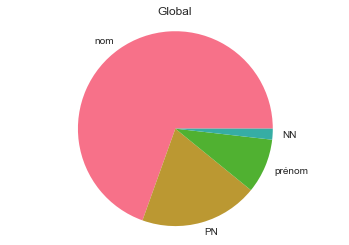

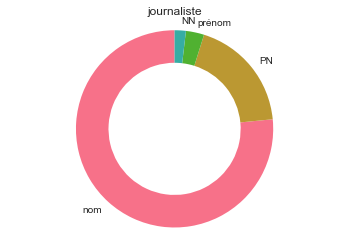

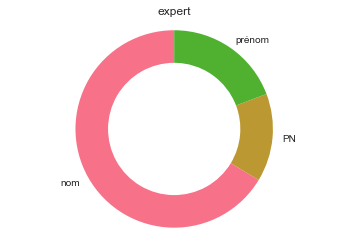

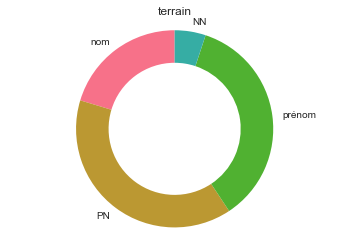

In [142]:
ax=dfJoueurs[u"nom PN prénom NN".split(" ")].sum().plot("pie",title="Global")
ax.axis('equal')
ax.set(ylabel="")
plt.show()

for spk in spkNoms:
    ax=dfSpkJoueurs[spk][u"nom PN prénom NN".split(" ")].sum().plot("pie",
                                                                    wedgeprops=dict(width=0.33),
#                                                                    autopct=lambda p: '%1d%%'%round(p) if round(p) > 0 else '',
#                                                                    pctdistance = 0.85,
                                                                    startangle=90,
                                                                    title=spkNoms[spk])
    ax.axis('equal')
    ax.set(ylabel="")
    plt.show()

In [124]:
dfSpkJoueurs={}
for spk in spkNoms:
    print spk
    dfSpkJoueurs[spk]=pd.DataFrame(columns=range(4))
    for joueur in joueurDenominations:
        print joueur
        dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())&(dfNomsMatch["Spk"]==spk)][[joueur]].apply(np.sum)
        dfSpkJoueurs[spk]=dfSpkJoueurs[spk].append(dfAX.T)
    dfSpkJoueurs[spk]["total"]=dfSpkJoueurs[spk][0]+dfSpkJoueurs[spk][1]+dfSpkJoueurs[spk][2]+dfSpkJoueurs[spk][3]
    dfSpkJoueurs[spk].columns=u"prénom nom PN NN total".split(" ")

spk1
Ignacio Corleto=Ar
Pieter de Villiers=Fr
Rémy Martin=Fr
Yannick Jauzion=Fr
Julien Bonnaire=Fr
Manuel Contepomi=Ar
Juan Manuel Leguizamón=Ar
Jo Maso=Fr
Jérôme Thion=Fr
Jean-Baptiste Élissalde=Fr
Sébastien Chabal=Fr
Thierry Lacroix=Ot
Ignacio Fernández Lobbe=Ar
Frédéric Michalak=Fr
Olivier Milloud=Fr
Fabrice Landreau=Ot
Martín Scelzo=Ar
Juan Martín Fernández Lobbe=Ar
Patricio Albacete=Ar
Imanol Harinordoquy=Fr
Damien Traille=Fr
David Ellis=En
Lucas Borges=Ar
Lucas Ostiglia=Ar
Rodrigo Roncero=Ar
David Skrela=Fr
Marcelo Loffreda=Ar
Christophe Dominici=Fr
Raphaël Ibañez=Fr
Thierry Gilardi=Ot
Bernard Laporte=Fr
Agustín Pichot=Ar
Rimas Álvarez Kairelis=Ar
Cédric Heymans=Fr
Mario Ledesma=Ar
Hernán Senillosa=Ar
Juan Martín Hernández=Ar
Thierry Dusautoir=Fr
Aurélien Rougerie=Fr
Pierre Mignoni=Fr
Felipe Contepomi=Ar
Jean-Baptiste Poux=Fr
Fabien Pelous=Fr
Dimitri Szarzewski=Fr
Serge Betsen=Fr
spk2
Ignacio Corleto=Ar
Pieter de Villiers=Fr
Rémy Martin=Fr
Yannick Jauzion=Fr
Julien Bonnaire=Fr
Ma

In [125]:
dfSpkJoueurs

{'spk1':                                prénom nom  PN NN total
 Ignacio Corleto=Ar                  0  12   1  0    13
 Pieter de Villiers=Fr               0   5   4  0     9
 Rémy Martin=Fr                      0  14   8  0    22
 Yannick Jauzion=Fr                  0  14   1  0    15
 Julien Bonnaire=Fr                  0   0   0  0     0
 Manuel Contepomi=Ar                 0   2   0  0     2
 Juan Manuel Leguizamón=Ar           0   4   0  0     4
 Jo Maso=Fr                          0   1   0  0     1
 Jérôme Thion=Fr                     0   2   2  0     4
 Jean-Baptiste Élissalde=Fr          0   0   1  0     1
 Sébastien Chabal=Fr                 0   7   1  0     8
 Thierry Lacroix=Ot                  2   0   3  0     5
 Ignacio Fernández Lobbe=Ar          0   0   0  1     1
 Frédéric Michalak=Fr                0   2   1  0     3
 Olivier Milloud=Fr                  1   0   0  0     1
 Fabrice Landreau=Ot                 5   0   1  0     6
 Martín Scelzo=Ar                    0  

# Distribution des dénominations par joueurs (stacked bars)

## global trié par nombre de dénominations

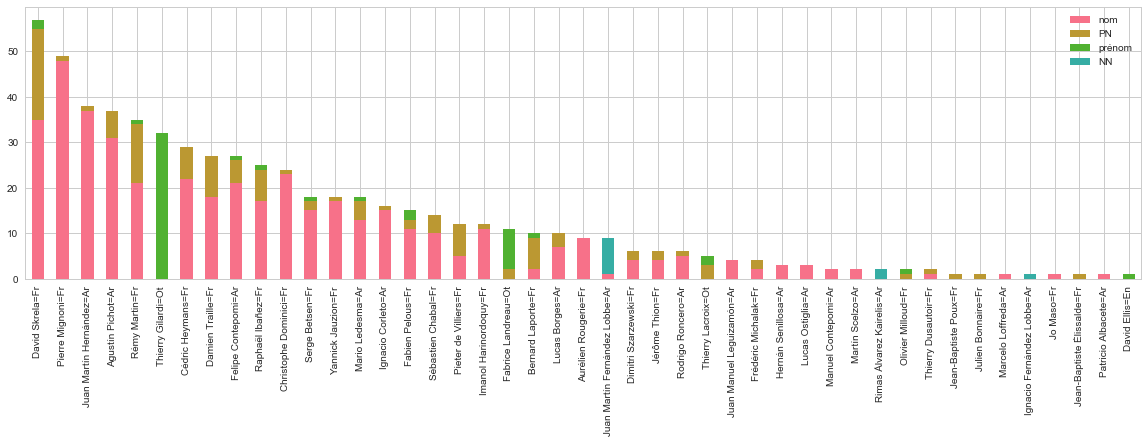

In [41]:
ax=dfJoueurs.sort_values("total",ascending=False).iloc[:][["nom","PN",u"prénom","NN"]].plot(kind="bar",stacked=True, figsize=(20,5))


## 22 plus fréquents

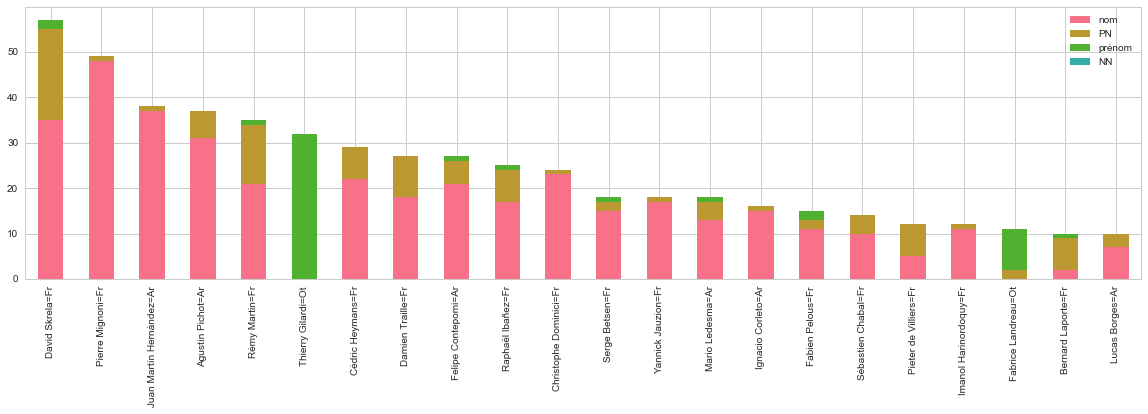

In [42]:
dfJoueurs.sort_values("total",ascending=False).iloc[:22][["nom","PN",u"prénom","NN"]].plot(kind="bar",stacked=True, figsize=(20,5))

## queue de la distribution

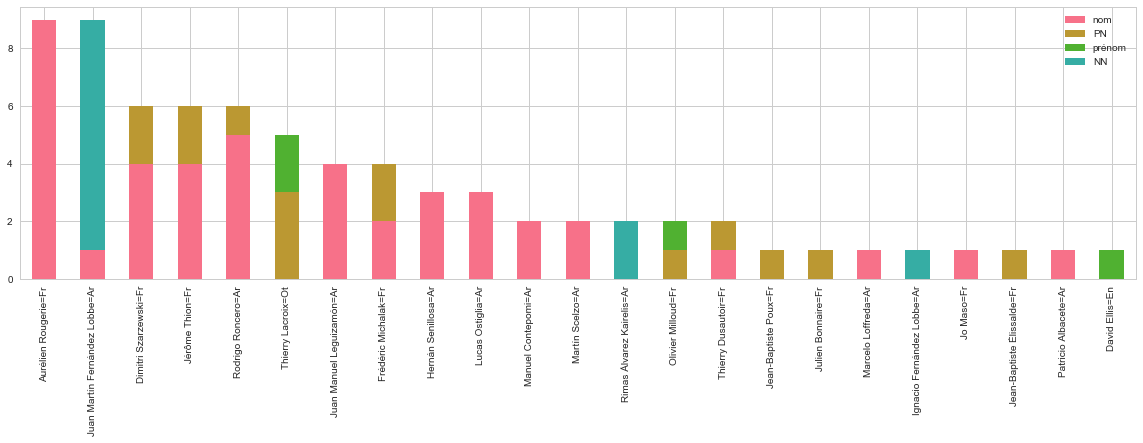

In [45]:
dfJoueurs.sort_values("total",ascending=False).iloc[22:][["nom","PN",u"prénom","NN"]].plot(kind="bar",stacked=True, figsize=(20,5))

## Pourcentages des dénominations par joueurs

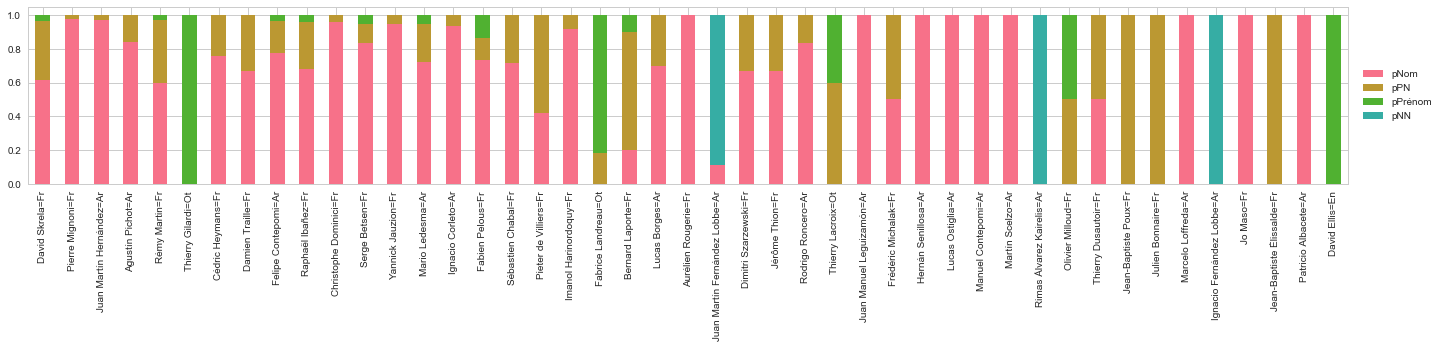

In [180]:
dfAX=dfJoueurs.sort_values("total",ascending=False).iloc[:][["pNom","pPN",u"pPrénom","pNN"]]
ax=dfAX.plot(kind="bar",stacked=True, figsize=(20,5))
ax.legend(loc="right",bbox_to_anchor=(1.07, 0.5))
plt.tight_layout()
plt.show()

## Dénominations des joueurs par speaker

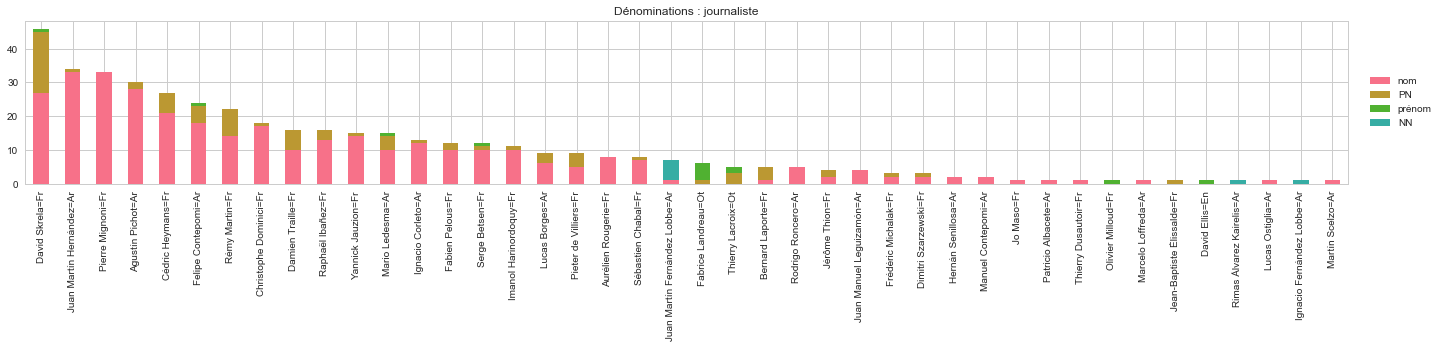

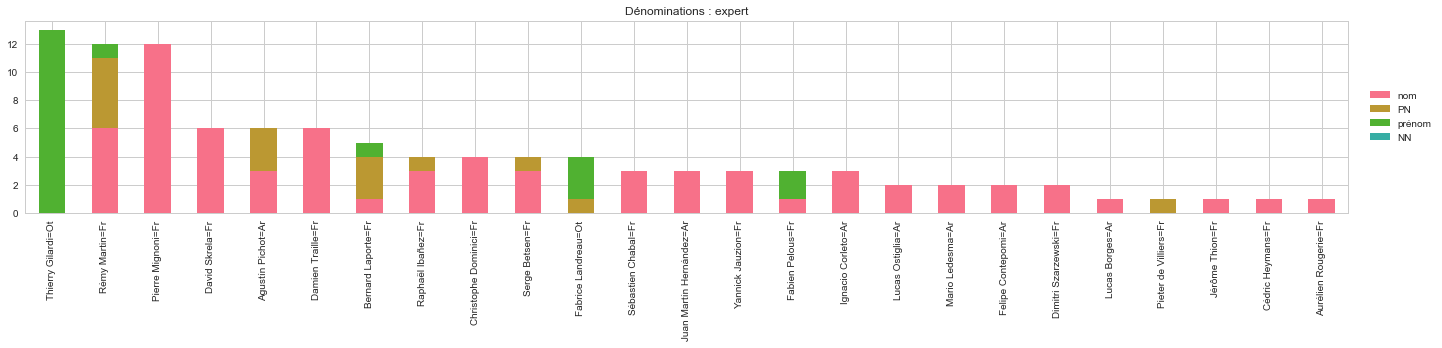

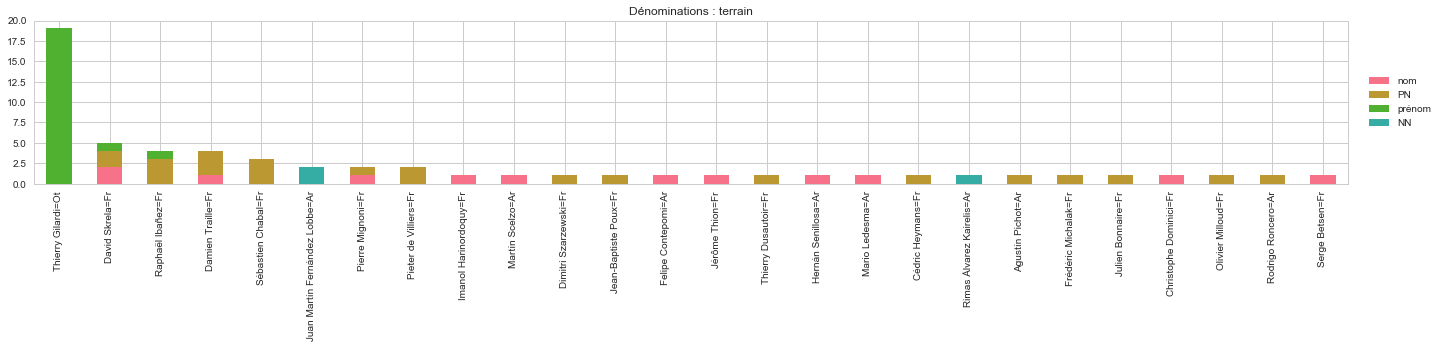

In [186]:
for spk in spkNoms:
    dfAX=dfSpkJoueurs[spk][dfSpkJoueurs[spk]["total"]>0].sort_values("total",ascending=False).iloc[:][["nom","PN",u"prénom","NN"]]
    ax=dfAX.plot(kind="bar",
                 stacked=True, 
                 figsize=(20,5),
                 title=u"Dénominations : %s"%spkNoms[spk]
                 )
    ax.legend(loc="right",bbox_to_anchor=(1.07, 0.5))
    plt.tight_layout()
    plt.show()
    

# Faire des donuts pour les dénominations
- distribution des dénominations par type de tour
- distribution des dénominations par plage de RJ5.00

# Faire des stacked bars
- distribution des dénominations en séparant les types de tours

In [284]:
dfNomsMatch.loc[(dfNomsMatch["joueurs"].notnull()),"RJ5"]=pd.cut(dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][u"RJ5.00"],range(10),include_lowest=True,labels=range(9))#.reset_index()#.groupby(by="RJ5.00").count()


In [285]:
dfNomsMatch["RJ5"].max()

8

# Distribution des dénominations par RJ

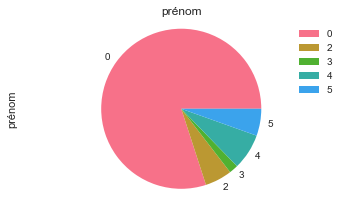

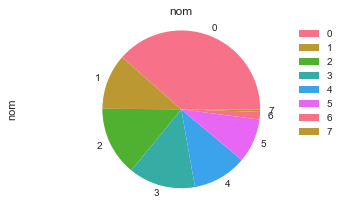

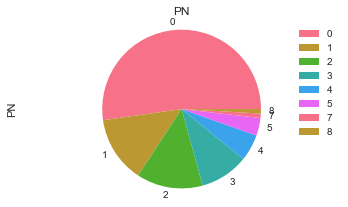

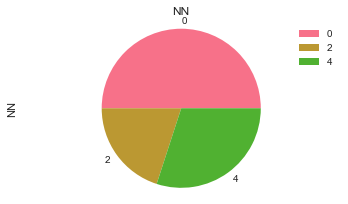

In [299]:
for denom in u"prénom nom PN NN".split(" "):
    dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())&(dfNomsMatch[denom]!=0)][["RJ5",denom]].groupby("RJ5").count()
    dfAX
    ax=dfAX.plot(kind="pie",y=denom,figsize=(5,3))
    ax.axis("equal")
    plt.title(denom)
    plt.tight_layout()
    plt.show()

In [29]:
joueur="David Skrela=Fr"
dfNomsMatch[(dfNomsMatch["joueurs"].notnull()) & (dfNomsMatch[joueur]!="0,0,0,0")][["noms",joueur,"début","fin"]]

/Users/gilles/anaconda/lib/python2.7/site-packages/pandas/core/ops.py:1603: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x, y, op)


noms David Skrela=Fr    début      fin
timeline                                                         
3616.0             David Skrela    [0, 0, 1, 0]    36.16    38.52
4232.0                  Roncero    [0, 0, 0, 0]    42.32    43.84
4456.0                   Pichot    [0, 0, 0, 0]    44.56    45.76
4656.0                Hernandez    [0, 0, 0, 0]    46.56    47.80
7144.0           Raphaël Ibañez    [0, 0, 0, 0]    71.44    73.84
8120.0                   Pichot    [0, 0, 0, 0]    81.20    82.40
8472.0           Cédric Heymans    [0, 0, 0, 0]    84.72    88.12
8844.0                   Pichot    [0, 0, 0, 0]    88.44    90.44
9092.0                  Heymans    [0, 0, 0, 0]    90.92    91.88
9596.0             David Skrela    [0, 0, 1, 0]    95.96    96.96
9920.0                  Thierry    [0, 0, 0, 0]    99.20    99.64
10000.0          Agustin Pichot    [0, 0, 0, 0]   100.00   102.36
11104.0                 Heymans    [0, 0, 0, 0]   111.04   112.40
11740.0                 Ledesma    [0, 0, 0, 0]   117.40   118.44
11872.0     Mario Ledesma,Mario    [0, 0, 0, 0]   118.72   121.64
13568.0                 Ledesma    [0, 0, 0, 0]   135.68   136.80
14360.0               Hernandez    [0, 0, 0, 0]   143.60   146.12
14744.0          Cédric Heymans    [0, 0, 0, 0]   147.44   150.64
16056.0   Juan Martin Hernandez    [0, 0, 0, 0]   160.56   163.80
16480.0          Cédric Heymans    [0, 0, 0, 0]   164.80   166.64
18164.0               Hernandez    [0, 0, 0, 0]   181.64   182.48
19068.0           Mario Ledesma    [0, 0, 0, 0]   190.68   194.04
19872.0             Rémy Martin    [0, 0, 0, 0]   198.72   201.92
20468.0                Albacete    [0, 0, 0, 0]   204.68   205.80
20716.0         Fernandez Lobbe    [0, 0, 0, 0]   207.16   208.76
21956.0               Hernandez    [0, 0, 0, 0]   219.56   220.72
22336.0      Hernandez,Dominici    [0, 0, 0, 0]   223.36   225.36
23160.0                 Mignoni    [0, 0, 0, 0]   231.60   234.32
23464.0             de Villiers    [0, 0, 0, 0]   234.64   235.76
23808.0      Pieter de Villiers    [0, 0, 0, 0]   238.08   241.44
...                         ...             ...      ...      ...
577614.0     Dimitri Szarzewski    [0, 0, 0, 0]  5776.14  5778.86
580710.0                 Pelous    [0, 0, 0, 0]  5807.10  5808.02
580858.0          Pelous,Ibañez    [0, 0, 0, 0]  5808.58  5810.41
582162.0                 Chabal    [0, 0, 0, 0]  5821.62  5822.22
583170.0                 Pichot    [0, 0, 0, 0]  5831.70  5832.37
583262.0              Hernandez    [0, 0, 0, 0]  5832.62  5833.45
583430.0             Szarzewski    [0, 0, 0, 0]  5834.30  5836.02
583722.0                 Chabal    [0, 0, 0, 0]  5837.22  5837.78
583778.0                 Chabal    [0, 0, 0, 0]  5837.78  5838.74
584082.0                 Betsen    [0, 0, 0, 0]  5840.82  5842.90
584586.0                  Serge    [0, 0, 0, 0]  5845.86  5846.58
584658.0                 Betsen    [0, 0, 0, 0]  5846.58  5847.06
584849.0                 Chabal    [0, 0, 0, 0]  5848.49  5850.06
585766.0    Betsen,Serge Betsen    [0, 0, 0, 0]  5857.66  5862.78
586310.0                 Chabal    [0, 0, 0, 0]  5863.10  5864.41
586745.0  Betsen,Raphaël Ibañez    [0, 0, 0, 0]  5867.45  5871.02
587162.0           David Skrela    [0, 0, 1, 0]  5871.62  5874.10
587478.0                Fabrice    [0, 0, 0, 0]  5874.78  5878.54
588014.0           David Skrela    [0, 0, 1, 0]  5880.14  5880.98
588470.0          Ibañez,Pelous    [0, 0, 0, 0]  5884.70  5886.18
588658.0                 Betsen    [0, 0, 0, 0]  5886.58  5889.18
590018.0  Szarzewski,Szarzewski    [0, 0, 0, 0]  5900.18  5902.70
590926.0                 Betsen    [0, 0, 0, 0]  5909.26  5910.86
591322.0                 Chabal    [0, 0, 0, 0]  5913.22  5915.10
591686.0              Contepomi    [0, 0, 0, 0]  5916.86  5918.45
593066.0          Fred Michalak    [0, 0, 0, 0]  5930.66  5932.45
593562.0                  David    [1, 0, 0, 0]  5935.62  5936.58
593658.0                 Skrela    [0, 1, 0, 0]  5936.58  5936.94
5

# Graphiques

## Corrélation Entités nommées

In [72]:
print
dfTemp=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][["noms","début","fin","excitation","texte","discours","Spk","RJ5.00","D5.00"]]
for ix,row in dfTemp.iloc[:250].iterrows():
    print ix,row[["discours","noms","excitation","Spk","RJ5.00","D5.00"]].tolist()



3616.0 [u'narration', u'David Skrela', 2.0, u'spk1', 0.58, 3.68]
4232.0 [u'narration suspensive', u'Roncero', 2.0, u'spk1', 3.0, 3.268]
4456.0 [u'narration', u'Pichot', 2.0, u'spk1', 3.56, 3.056]
4656.0 ['narration suspensive', u'Hernandez', 2.0, u'spk1', 4.5, 2.944]
7144.0 [u'narration', u'Rapha\xebl Iba\xf1ez', 2.0, u'spk1', 0.0, 2.944]
8120.0 [u'narration', u'Pichot', 2.0, u'spk1', 3.1, 3.18]
8472.0 [u'narration suspensive', u'C\xe9dric Heymans', 2.0, u'spk1', 4.0, 3.672]
8844.0 [u'narration', u'Pichot', 2.0, u'spk1', 4.28, 3.764]
9092.0 ['narration', u'Heymans', 2.0, u'spk1', 3.0, 3.992]
9596.0 ['narration', u'David Skrela', 2.0, u'spk1', 3.96, 3.212]
9920.0 ['invocation', u'Thierry', 0.0, u'spk3', 2.5, 3.94]
10000.0 ['explication', u'Agustin Pichot', 2.0, u'spk2', 2.5, 4.1]
11104.0 [u'explication', u'Heymans', 2.0, u'spk2', 0.5, 5.916]
11740.0 [u'narration', u'Ledesma', 0.0, u'spk2', 0.5, 6.5]
11872.0 ['invocation,narration', u'Mario Ledesma,Mario', 2.0, u'spk1', 0.5, 5.768]
1356

150720.0 ['narration', u'Pichot', 2.0, u'spk1', 5.8, 3.14]
150948.0 [u'narration suspensive', u'Borges', 2.0, u'spk1', 5.5, 3.308]
151164.0 [u'narration', u'Heymans', 2.0, u'spk1', 6.0, 2.216]
151700.0 [u'narration', u'Corleto', 2.0, u'spk1', 3.5, 1.5]
152056.0 [u'narration', u'Contepomi', 4.0, u'spk1', 2.5, 2.112]
152388.0 ['narration', u'Jauzion', 4.0, u'spk1', 1.94, 2.748]
154324.0 ['narration suspensive', u'Contepomi', 2.0, u'spk1', 0.0, 6.424]
155304.0 [u'point de vue', u'Thierry', 2.0, u'spk2', 0.5, 5.896]
158136.0 ['narration', u'Felipe Contepomi', 0.0, u'spk1', 0.8200000000000001, 4.264]
160516.0 ['invocation', u'Thierry', 0.0, u'spk3', 1.0, 3.1]
160583.0 ['description', u'Damien Traille', 0.0, u'spk3', 1.0, 3.1]
160679.0 [u'description,explication', u'Fred Michalak', 0.0, u'spk3', 1.0, 3.495]
161304.0 [u'explication', u'David Skrela', 0.0, u'spk1', 0.98, 4.688000000000001]
161824.0 ['explication', u'Jauzion,Traille', 0.0, u'spk1', 0.88, 4.044]
161952.0 [u'narration suspensive'

# Graphe F0

In [46]:
dfF0Base=pd.read_csv("France_Argentine_Intro_FR-rawf0.csv",sep="\t")
dfF0Base.columns="label timeline f0".split(" ")

In [48]:
dfF0=dfF0Base[["timeline","f0"]]
dfF0["timeline"]=pd.to_numeric(dfF0["timeline"], errors='coerce')
dfF0["f0"]=pd.to_numeric(dfF0["f0"], errors='coerce')

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [49]:
dfF0=dfF0.set_index("timeline")

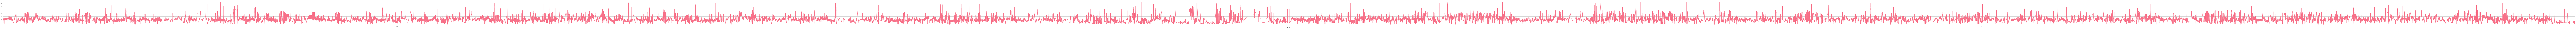

In [50]:
dfF0.plot(figsize=(500,5))

David Skrela 3616.0


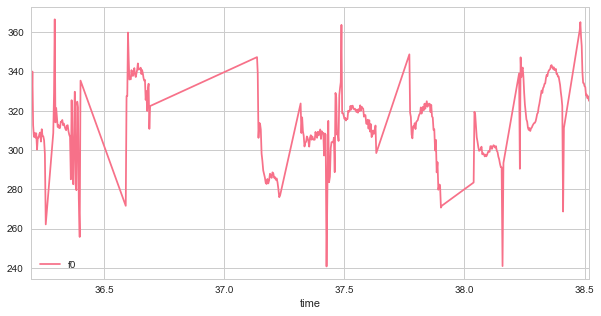

Roncero 4232.0


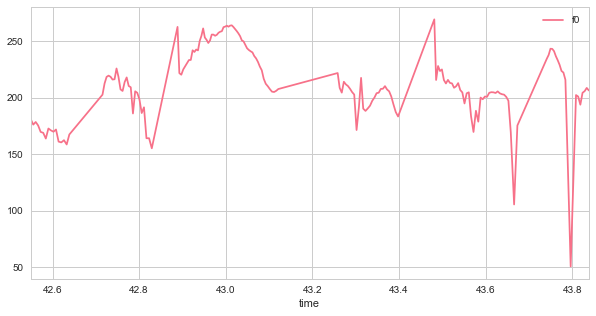

Pichot 4456.0


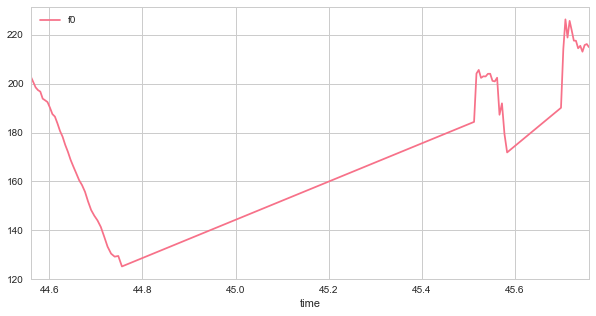

Hernandez 4656.0


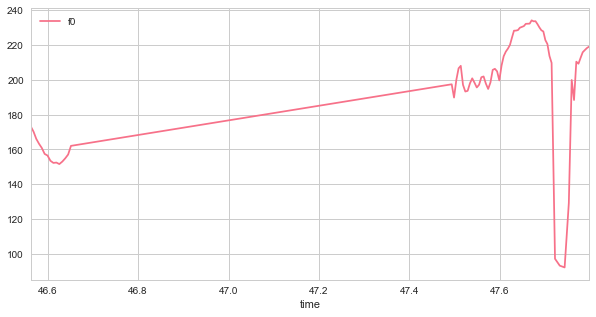

Raphaël Ibañez 7144.0


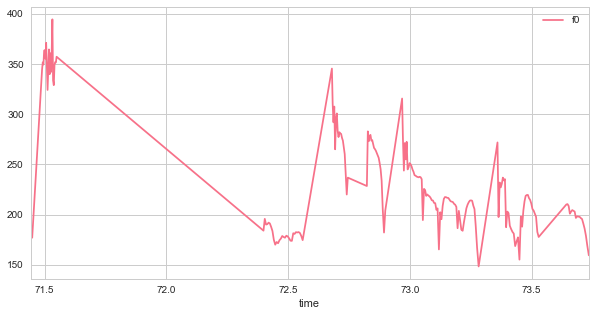

Pichot 8120.0


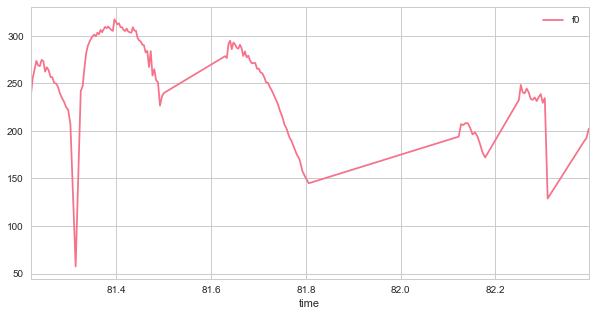

Cédric Heymans 8472.0


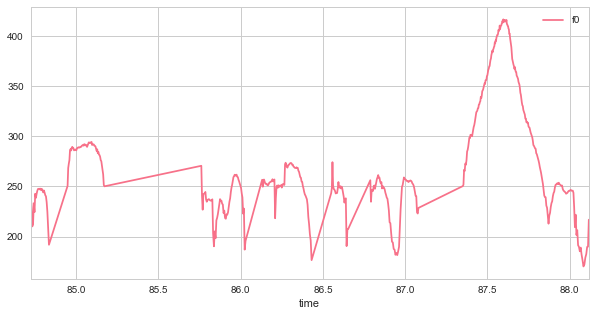

Pichot 8844.0


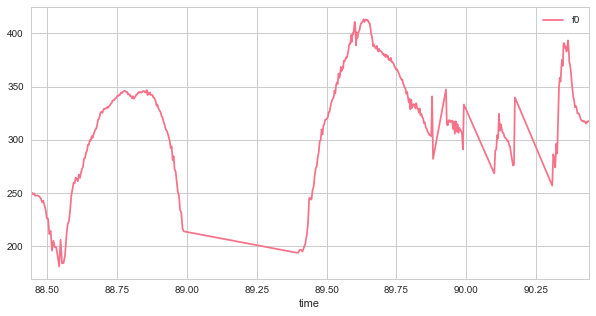

Heymans 9092.0


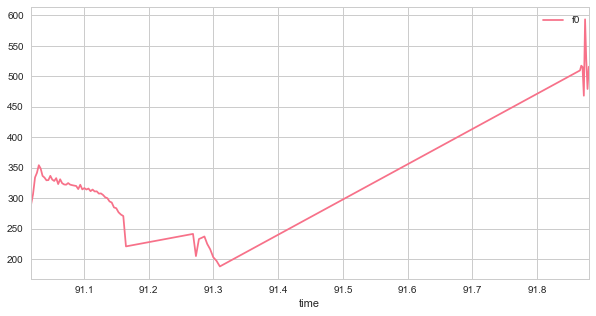

David Skrela 9596.0


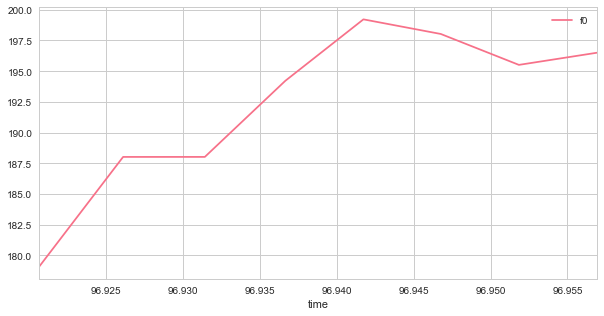

Thierry 9920.0


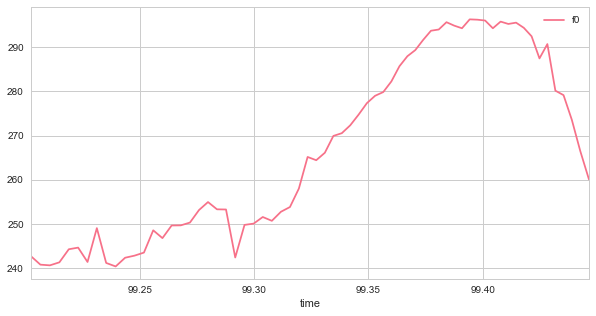

Agustin Pichot 10000.0


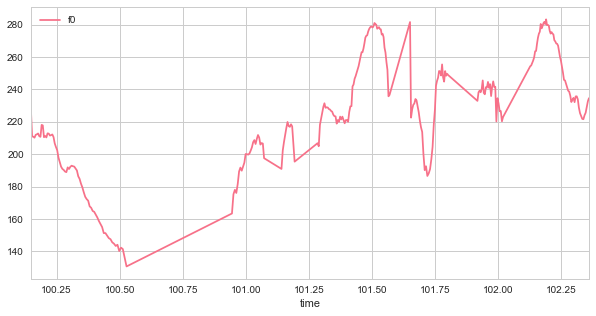

Heymans 11104.0


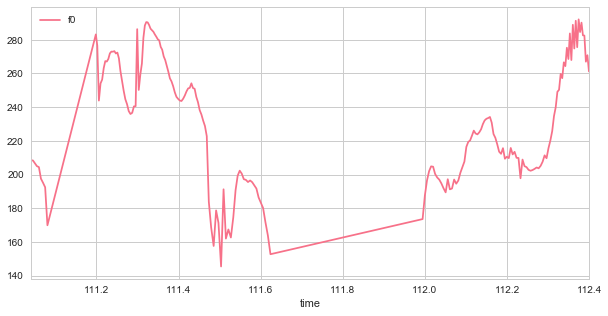

Ledesma 11740.0


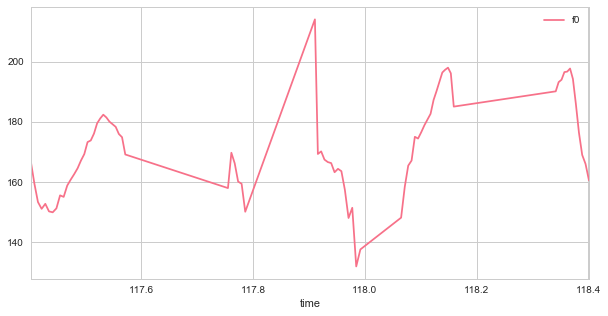

Mario Ledesma,Mario 11872.0


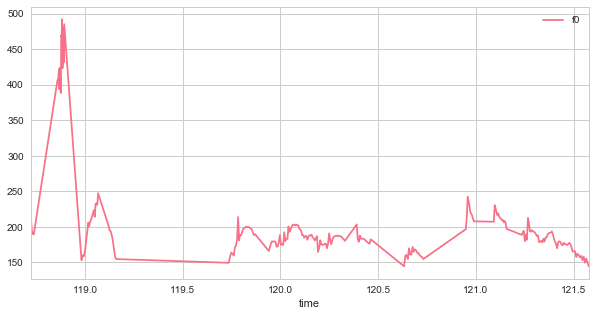

Ledesma 13568.0


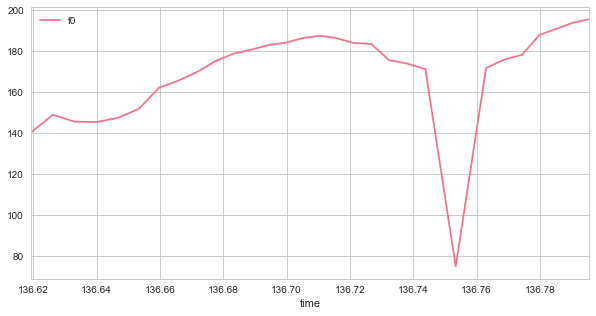

Hernandez 14360.0


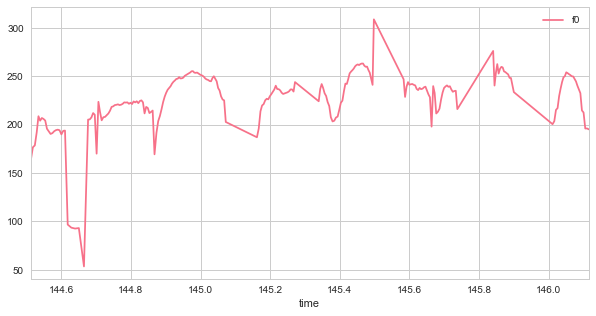

Cédric Heymans 14744.0


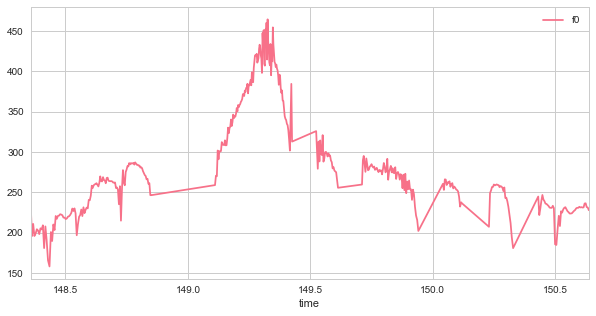

Juan Martin Hernandez 16056.0


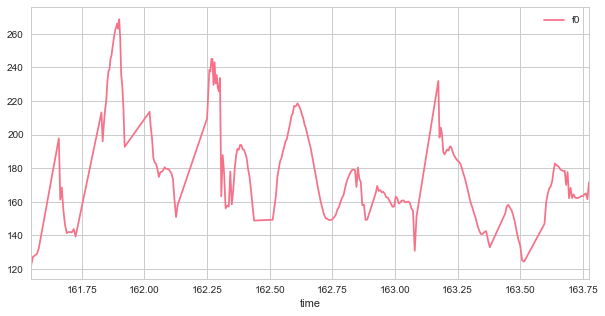

Cédric Heymans 16480.0


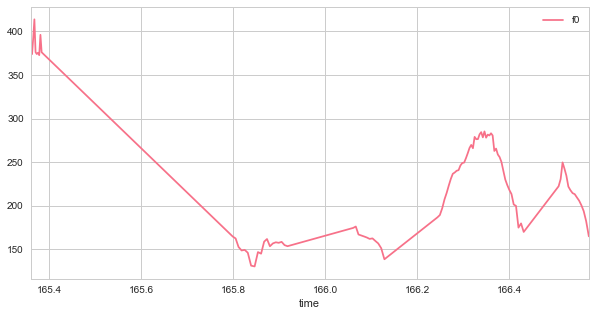

Hernandez 18164.0


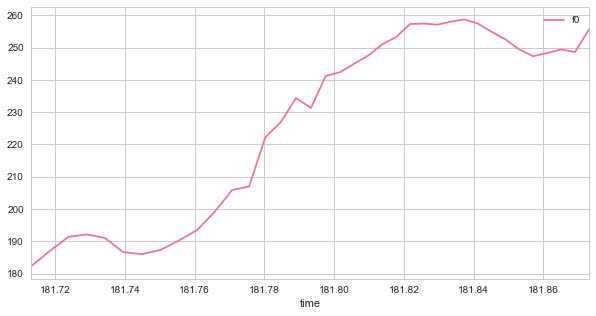

Mario Ledesma 19068.0


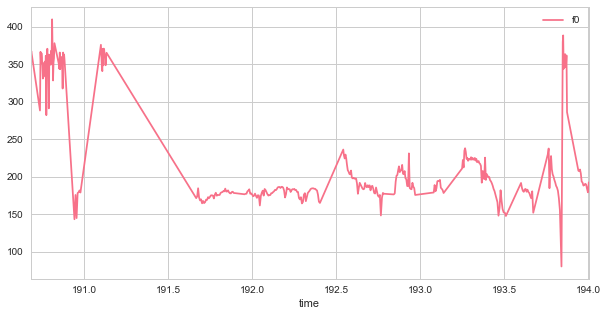

Rémy Martin 19872.0


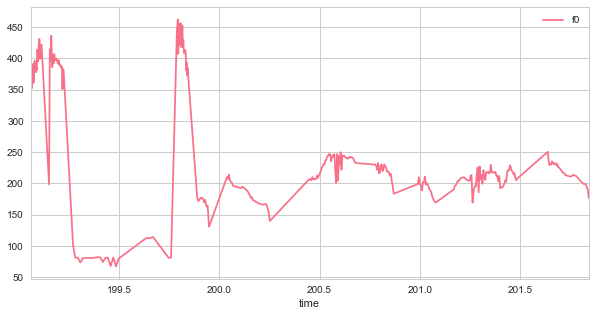

Albacete 20468.0


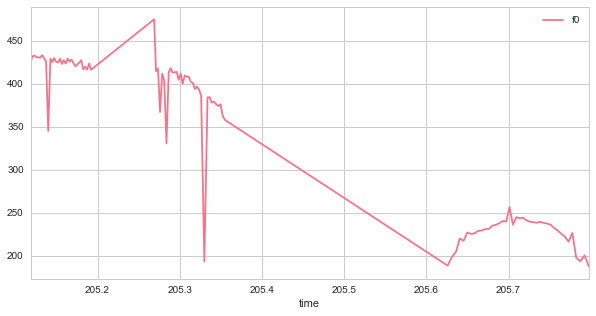

Fernandez Lobbe 20716.0


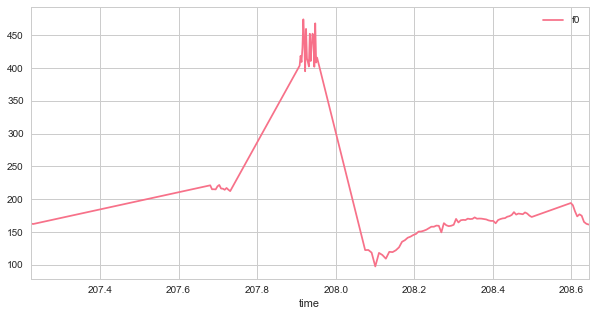

In [35]:
dfTemp=dfNomsMatch[(dfNomsMatch["joueurs"].notnull()) & (dfNomsMatch[joueur]!="0,0,0,0")][["noms",joueur,"début","fin"]]
for ix,row in dfTemp.iloc[:25].iterrows():
    print row["noms"],ix
    try:
        ax=dfF0[(dfF0.index>=row["début"])&(dfF0.index<=row["fin"])].plot(figsize=(10,5))
        plt.show()
    except:
        pass